# 실습4

In [1]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

if os.name=='nt':
    font_family = 'Malgun Gothic'
else:
    font_family = 'AppleGothic'
    
sns.set(font=font_family, rc = {'axes.unicode_minus':False})

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
columns = ['sepal_width', 'sepal_length', 'petal_length', 'petal_width']
data = pd.DataFrame(iris.data,columns=columns)
sy = pd.Series(iris.target, dtype='category')
sy = sy.cat.rename_categories(iris.target_names)
data['spicy'] = sy

cols = iris.feature_names
data.head()

,sepal_width,sepal_length,petal_length,petal_width,spicy
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df_cov = data.cov()
df_cov

,sepal_width,sepal_length,petal_length,petal_width
sepal_width,0.685694,-0.042434,1.274315,0.516271
sepal_length,-0.042434,0.189979,-0.329656,-0.121639
petal_length,1.274315,-0.329656,3.116278,1.295609
petal_width,0.516271,-0.121639,1.295609,0.581006


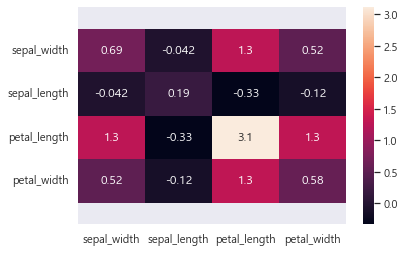

In [4]:
ax = sns.heatmap(df_cov, annot=True)
ylim = ax.get_ylim()
ax.set_ylim(ylim[0]+0.5, ylim[1]-0.5)
plt.show()

In [5]:
correlation_matrix = data.corr()
correlation_matrix

,sepal_width,sepal_length,petal_length,petal_width
sepal_width,1.000000,-0.117570,0.871754,0.817941
sepal_length,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


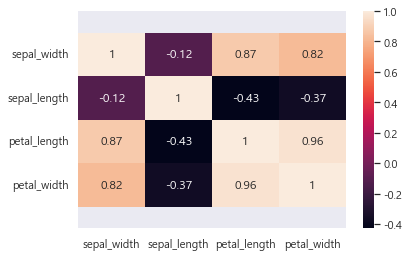

In [6]:
ax = sns.heatmap(correlation_matrix, annot=True)
ylim = ax.get_ylim()
ax.set_ylim(ylim[0]+0.5, ylim[1]-0.5)
plt.show()

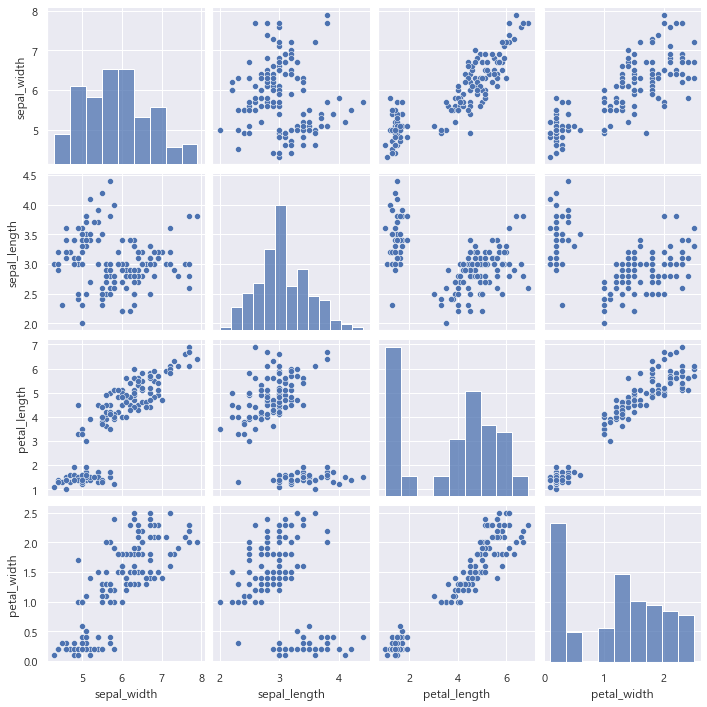

In [7]:
sns.pairplot(data, diag_kind='hist')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


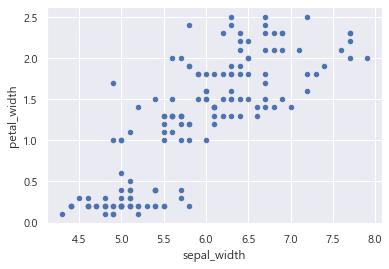

In [15]:
data.plot(kind='scatter', x='sepal_width', y='petal_width')
plt.show()

In [16]:
import scipy.stats as sp

corr_values, pval = sp.pearsonr(data['sepal_width'], data['petal_width'])

print('상관계수 : ', corr_values)
print('p_value : ', format(pval, '.55f'))

상관계수 :  0.8179411262715757
p_value :  0.0000000000000000000000000000000000002325498079793166956


In [11]:
cross_data = pd.DataFrame(
                        {'영양제':['복용', '복용', '복용', '복용', '복용', '복용', '복용', '복용',
                                   '복용', '복용', '복용', '복용', '복용', '복용', '복용', '복용',
                                   '복용', '복용', '복용', '복용',
                                   '미복용', '미복용', '미복용', '미복용', '미복용', '미복용',
                                   '미복용', '미복용', '미복용','미복용', '미복용', '미복용',
                                   '미복용', '미복용', '미복용','미복용', '미복용', '미복용',
                                   '미복용', '미복용'],
                        '감기여부':['유', '유', '유', '유', '유', '무', '무', '무', '무', '무',
                                    '무', '무', '무', '무', '무', '무', '무', '무', '무', '무',
                                    '유', '유', '유', '유', '유','유', '유', '유', '유', '유',
                                    '유', '유', '무', '무', '무', '무', '무', '무', '무', '무']})

cross_data.head()

,영양제,감기여부
0,복용,유
1,복용,유
2,복용,유
3,복용,유
4,복용,유


In [12]:
print(pd.crosstab(cross_data['영양제'], cross_data['감기여부'], margins=True))

data_crosstab = pd.crosstab(cross_data['영양제'], cross_data['감기여부'], margins=False)

감기여부   무   유  All
영양제              
미복용    8  12   20
복용    15   5   20
All   23  17   40


In [13]:
data_crosstab

감기여부,무,유
영양제,,
미복용,8,12
복용,15,5


In [14]:
from scipy.stats import chi2_contingency

result = chi2_contingency(observed=data_crosstab, correction=False)
print("1. 카이제곱 통계량 : ", result[0])
print("2. p-value : ", result[1])
print("3. df : ", result[2])
print("4. 기대값 행렬 : ")
pd.DataFrame(result[3]).rename(index={0:'복용', 1:'미복용'}, columns={0:'유', 1:'무'})

1. 카이제곱 통계량 :  5.012787723785166
2. p-value :  0.025160759200408785
3. df :  1
4. 기대값 행렬 : 


,유,무
복용,11.5,8.5
미복용,11.5,8.5
